In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [22]:
dia = load_diabetes()

In [23]:
print(dia)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [24]:
df_x = pd.DataFrame(dia.data, columns = dia.feature_names)
df_y = pd.DataFrame(dia.target)

In [25]:
df_x.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01  
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02  
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03  
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02  
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01

In [26]:
df_y.describe()

0
count  442.000000
mean   152.133484
std     77.093005
min     25.000000
25%     87.000000
50%    140.500000
75%    211.500000
max    346.000000

In [27]:
df_x.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [28]:
df_y.head()

0
0  151.0
1   75.0
2  141.0
3  206.0
4  135.0

# Question 1

1. Decide if it is a regression or classification problem?

The problem that we are solving is an regression problem since the target variable has a continous valued output.

# EDA

<AxesSubplot:>

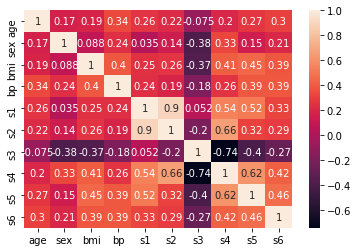

In [29]:
correlation_matrix = df_x.corr()

import seaborn as sns

sns.heatmap(correlation_matrix, annot = True)


In [30]:
# corre_thresh

In [31]:
corre_thresh = 0.6

corr = df_x.corr()
cols = df_x.columns


for i in range(len(cols)):
    for j in range(i + 1, len(cols)): # Go through all the columns
        attr1 = cols[i];
        attr2 = cols[j]; # temp variable
        
        if corr[attr1][attr2] > corre_thresh:
            print("(%s, %s): %.2f" % (attr1, attr2, corr[attr1][attr2]))

(s1, s2): 0.90
(s2, s4): 0.66
(s4, s5): 0.62


In [32]:
df_x = df_x.drop('s1', axis=1) # drop
df_x.head() # Display top 5 columns

age       sex       bmi        bp        s2        s3        s4  \
0  0.038076  0.050680  0.061696  0.021872 -0.034821 -0.043401 -0.002592   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.019163  0.074412 -0.039493   
2  0.085299  0.050680  0.044451 -0.005671 -0.034194 -0.032356 -0.002592   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.024991 -0.036038  0.034309   
4  0.005383 -0.044642 -0.036385  0.021872  0.015596  0.008142 -0.002592   

         s5        s6  
0  0.019908 -0.017646  
1 -0.068330 -0.092204  
2  0.002864 -0.025930  
3  0.022692 -0.009362  
4 -0.031991 -0.046641

# 2a: 1 st Model - Linear regression



In [33]:
reg = linear_model.LinearRegression()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [35]:
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = reg.predict(x_test)
print(y_pred)

[[140.95615712]
 [186.70616731]
 [138.75782205]
 [286.60796088]
 [120.44630564]
 [ 92.22709321]
 [257.22470511]
 [185.82427335]
 [ 74.95899401]
 [112.74214081]
 [ 97.3415869 ]
 [162.51689046]
 [ 70.47910407]
 [200.96869101]
 [ 94.10891355]
 [130.64922789]
 [213.88605715]
 [243.0848428 ]
 [200.78996769]
 [214.71282393]
 [204.7661963 ]
 [ 89.96507093]
 [ 67.21545812]
 [189.56267342]
 [158.80770999]
 [166.43108831]
 [197.51890293]
 [180.24895453]
 [ 49.04174909]
 [110.13659913]
 [180.76604076]
 [ 94.17319024]
 [126.59710896]
 [177.33055842]
 [167.98747927]
 [197.9067946 ]
 [117.80934118]
 [113.77738612]
 [136.95172908]
 [ 61.52273106]
 [ 69.61628491]
 [109.21812609]
 [166.40481169]
 [139.01153989]
 [172.13192304]
 [ 69.98017533]
 [ 77.24978066]
 [ 98.37237911]
 [ 61.63324099]
 [159.44554873]
 [160.27083008]
 [ 69.26090954]
 [120.25794932]
 [104.95742489]
 [173.89282947]
 [169.12506089]
 [ 90.71143852]
 [210.13328168]
 [119.03409944]
 [ 55.43498384]
 [182.48449922]
 [200.88895611]
 [142.19

In [37]:
y_test.head()

0
287  219.0
211   70.0
72   202.0
321  230.0
73   111.0

In [38]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

2853.514555566033


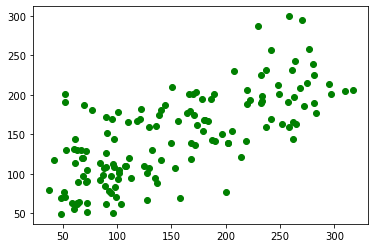

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='green')
plt.show()

# 2b: 2nd Model - KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [41]:
# KNN

accuracy_val = [] #to store accuracy values for different k

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_train, y_train)  #fit the model
y_pred=model.predict(x_test) #make prediction on test set
    
accuracy = metrics.accuracy_score(y_test, y_pred)
    
accuracy_val.append(accuracy) #store rmse values
print('Accuracy value for k = 1 is:',accuracy)



Accuracy value for k = 1 is: 0.0136986301369863


C:\Users\COVAXUSER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [42]:
y_pred

array([230., 155., 170., 248.,  51., 158., 233., 142., 104.,  71.,  59.,
       182.,  85., 311.,  88.,  88., 332., 180., 252., 275.,  99.,  78.,
       111., 235., 182., 127., 127.,  91.,  85., 177., 144., 144.,  88.,
       311., 164., 178.,  74.,  51., 311.,  75., 111.,  66., 225.,  89.,
       200.,  75.,  55.,  65., 181.,  93., 210., 134.,  55., 148., 138.,
       142.,  59., 225., 115.,  64., 121.,  99.,  85.,  65., 183., 236.,
       163., 225., 150., 126.,  58., 212., 155.,  58.,  65., 235., 252.,
       147., 178., 225., 144., 210.,  53., 111.,  49.,  84., 114., 181.,
       147., 138., 111., 195., 114.,  59.,  72., 198., 310., 265., 115.,
       127., 127., 124., 303.,  72.,  97., 143.,  47., 185., 128., 293.,
       131., 202., 296., 268., 123., 200.,  93.,  49., 152., 128.,  25.,
       214.,  47., 185.,  83., 202., 151., 178.,  91.,  85.,  80.,  92.,
       150., 150., 296., 107., 281.,  94.,  52., 288.,  72., 138., 248.,
       144., 306., 225.])

In [43]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

5019.808219178082


# 3: Conclusion

The dataset values seems to have been normalized and found that target values have a continous valued output. And hence started to fit a simple linear regression model. 

The model performance of simple linear regression was not very good. It had a mean square value error of 2853.

Then, for KNN algorithm, the model performance is very poor. The mean square error value is aroung 5k.

Hence, it is better to apply simple linear regresssion for our solution which works quite okay.
